# Predicting Insurance Claim Amounts

Objective: Estimate medical insurance charges based on personal data using Linear Regression.

## 1. Import Required Libraries
We import libraries for data handling, visualization, and regression modeling.

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 2. Load Dataset
Load the Medical Cost Personal Dataset using pandas.

In [2]:
# Load dataset
df = pd.read_csv("E:\internship datasets\insurance.csv")

# View first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Dataset Overview
Check dataset shape, column names, and missing values.

In [16]:
# Dataset shape
df.shape

(1338, 7)

In [17]:
# Column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 4. Data Visualization
Analyze how age, BMI, and smoking status affect insurance charges.

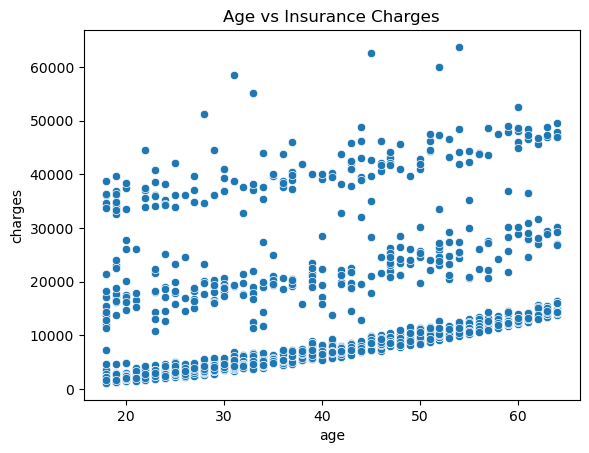

In [13]:
# Charges vs Age
plt.figure()
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Insurance Charges')
plt.show()



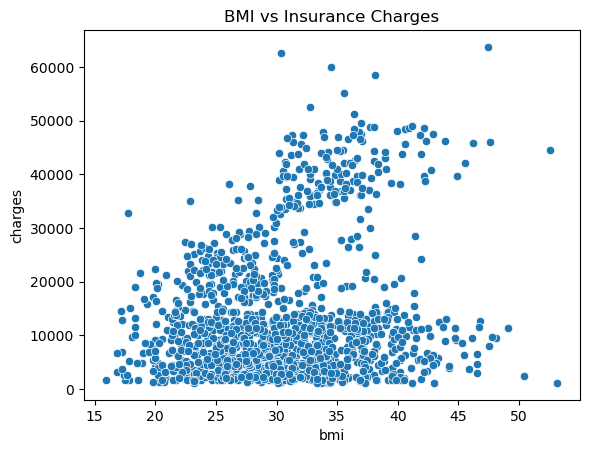

In [14]:
# Charges vs BMI
plt.figure()
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Insurance Charges')
plt.show()

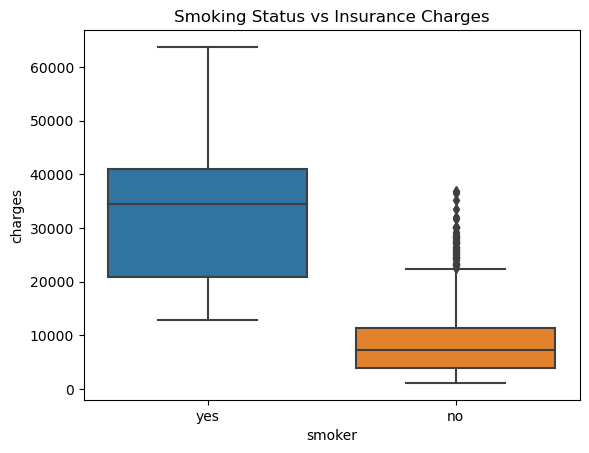

In [15]:
# Charges vs Smoking Status
plt.figure()
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoking Status vs Insurance Charges')
plt.show()

## 5. Encoding Categorical Variables
Convert categorical features into numerical format.

In [20]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)


In [21]:
# View encoded dataset
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## 6. Feature Selection
Separate features and target variable.

In [23]:
# Features (independent variables)
X = df_encoded.drop('charges', axis=1)

In [24]:
# Target variable (insurance charges)
y = df_encoded['charges']

## 7. Train-Test Split
Split the dataset into training and testing sets.

In [26]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## 8. Train Linear Regression Model
Train a Linear Regression model to predict insurance charges.

In [27]:
# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 9. Model Evaluation
Evaluate model performance using MAE and RMSE.

In [29]:
# Predict on test data
y_pred = model.predict(X_test)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

In [32]:
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [33]:
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 4181.194473753649
Root Mean Squared Error (RMSE): 5796.284659276272


## 10. Feature Correlation Analysis
Visualize correlation between features and insurance charges.

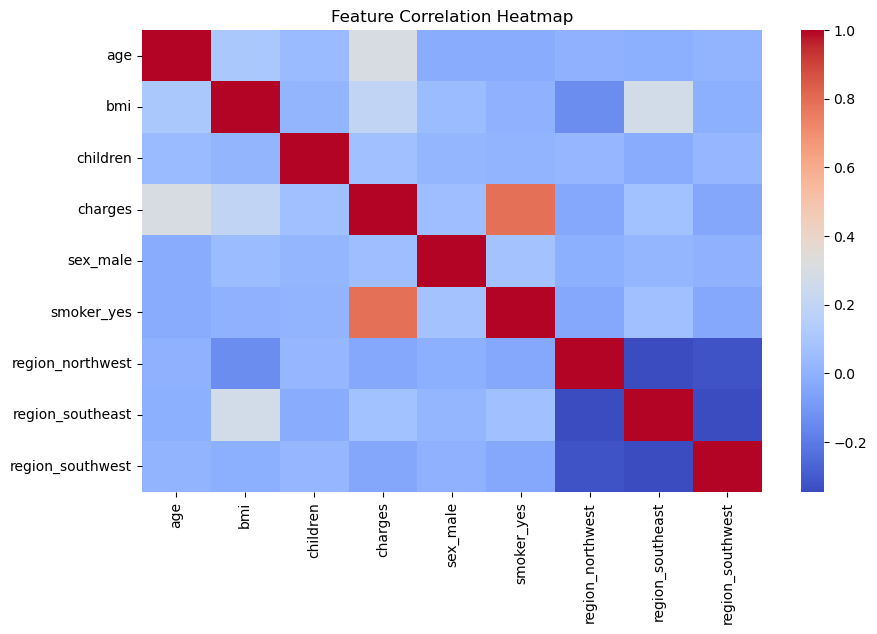

In [34]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()